<a href="https://colab.research.google.com/github/rsonar821/Unsupervised-Learning-Capstone-Project/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Project Title: Book Recommender System using Collaborative Filtering</u>**







## **Recommender System**

* During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

* In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

* Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Books Dataframe**

This dataframe contains the information regarding the books. Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset.

### **Columns present in the dataset:**


*   **ISBN:** Unique ID to identify a book
*   **Book-Title:** Title of the book

*   **Book-Author:** Author of the book
*   **Year-Of-Publication:** The year in which the book was published

*   **Publisher:** Publisher of the book
*   **Image-URL-S:** Image URL of the book (Small Size)

*   **Image-URL-M:** Image URL of the book (Medium Size)
*   **Image-URL-L:** Image URL of the book (Large Size)









In [3]:
# Importing the books dataframe

books_df = pd.read_csv('/content/drive/MyDrive/Books.csv')

In [4]:
# Printing the first 5 rows of the books dataframe

books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Printing the last 5 rows of the books dataframe

books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
# Checking the number of rows and columns of the books dataframe

print(f'The books dataframe has {books_df.shape[0]} rows and {books_df.shape[1]} columns')

The books dataframe has 271360 rows and 8 columns


In [7]:
# Printing the columns of the books dataframe

books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
# Checking the datatype of each column of the books dataframe

books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [9]:
# Checking if any duplicate rows in the books dataframe

books_df.duplicated().sum()

0

In [10]:
# Dropping the columns which are not required for the analysis

books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [11]:
# Renaming the columns for easiness

books_df.rename(columns = {'Book-Title':'Title', 'Book-Author':'Author',
                           'Year-Of-Publication':'Publication Year'}, inplace=True)

In [12]:
# Checking the unique number of entries in each column

books_df.nunique()

ISBN                271360
Title               242135
Author              102023
Publication Year       202
Publisher            16807
dtype: int64

In [13]:
# Checking the basic information of the books dataframe

books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271360 non-null  object
 1   Title             271360 non-null  object
 2   Author            271359 non-null  object
 3   Publication Year  271360 non-null  object
 4   Publisher         271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [14]:
# Printing the statistical information of the books dataframe

books_df.describe(include = 'all')

,ISBN,Title,Author,Publication Year,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [15]:
# Checking the number of null values in the books dataframe

books_df.isnull().sum()

ISBN                0
Title               0
Author              1
Publication Year    0
Publisher           2
dtype: int64

In [16]:
# Replacing the null values of the 'Author' column with the maximum repeated author
books_df['Author'].fillna('Agatha Christie', inplace=True)

# Replacing the null values of the 'Publisher' column with the maximum repeated publisher
books_df['Publisher'].fillna('Harlequin', inplace=True)

In [17]:
# Again checking the number of null values in the books dataframe

books_df.isnull().sum()

ISBN                0
Title               0
Author              0
Publication Year    0
Publisher           0
dtype: int64

### Top 10 authors who have written maximum number of books

In [18]:
# Creating a dataframe of authors having written maximum number of books
max_authors = pd.DataFrame(books_df['Author'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
max_authors.rename(columns = {'index':'Author', 'Author':'Count'}, inplace = True)

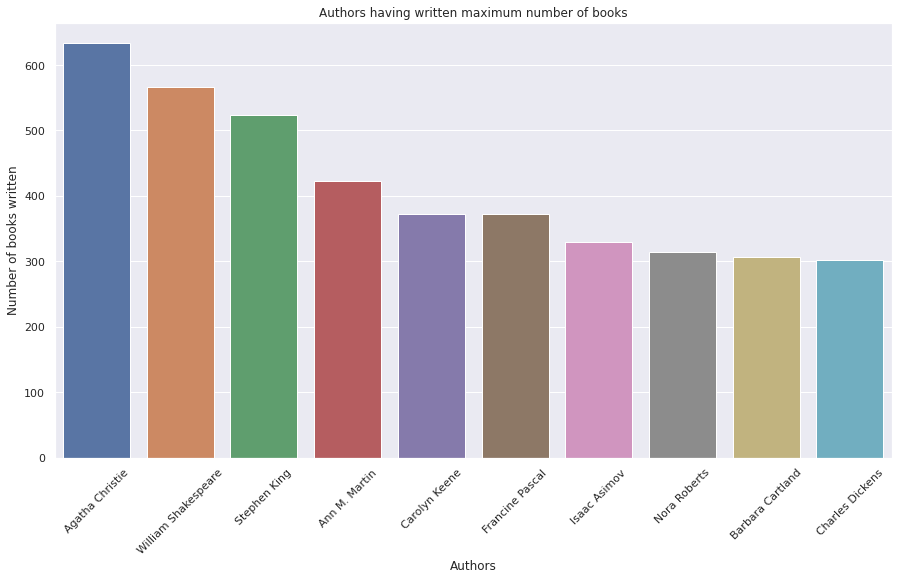

In [19]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x = 'Author', y = 'Count', data = max_authors)

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Authors having written maximum number of books')
figure.set(xlabel='Authors', ylabel='Number of books written')

# Displaying the graph
plt.show(figure)

### Top 10 years in which maximum number of books were published

In [20]:
# Creating a dataframe of years in which maximum number of books were published
top_years = pd.DataFrame(books_df['Publication Year'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_years.rename(columns = {'index':'publication_year', 'Publication Year':'Count'}, inplace=True)

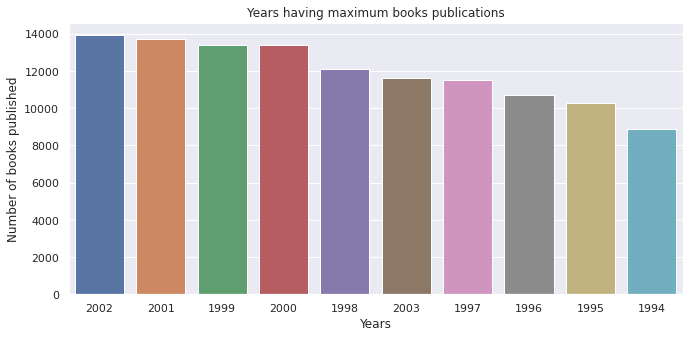

In [21]:
# Defining the plot size
plt.figure(figsize=(11,5))

# Plotting a bargraph
figure = sns.barplot(x='publication_year', y='Count', data=top_years, order=top_years.sort_values('Count', ascending=False).publication_year)

# Defining the title, xticks rotation and x and y labels
figure.set(title='Years having maximum books publications')
figure.set(xlabel='Years', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

### Top 10 publishers who have published maximum number of books

In [22]:
# Creating a dataframe of publishers having published maximum number of books
max_publishers = pd.DataFrame(books_df['Publisher'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
max_publishers.rename(columns = {'index':'Publisher', 'Publisher':'Count'}, inplace=True)

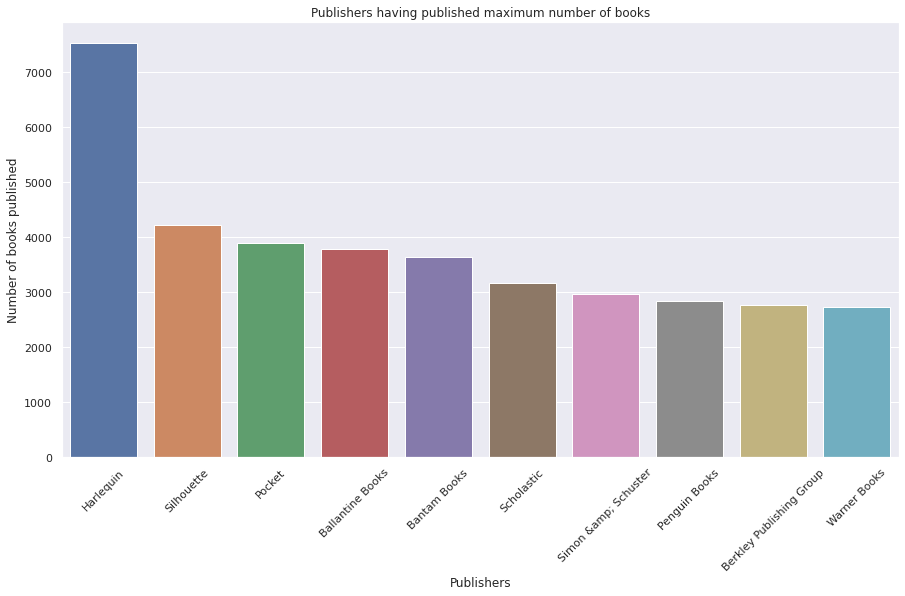

In [23]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x='Publisher', y='Count', data=max_publishers)

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Publishers having published maximum number of books')
figure.set(xlabel='Publishers', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

### Top 10 titles of the books repeated for maximum number of times

In [24]:
# Creating a dataframe of the titles repeated maximum number of times
max_titles = pd.DataFrame(books_df['Title'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
max_titles.rename(columns = {'index':'Title', 'Title':'Count'}, inplace = True)

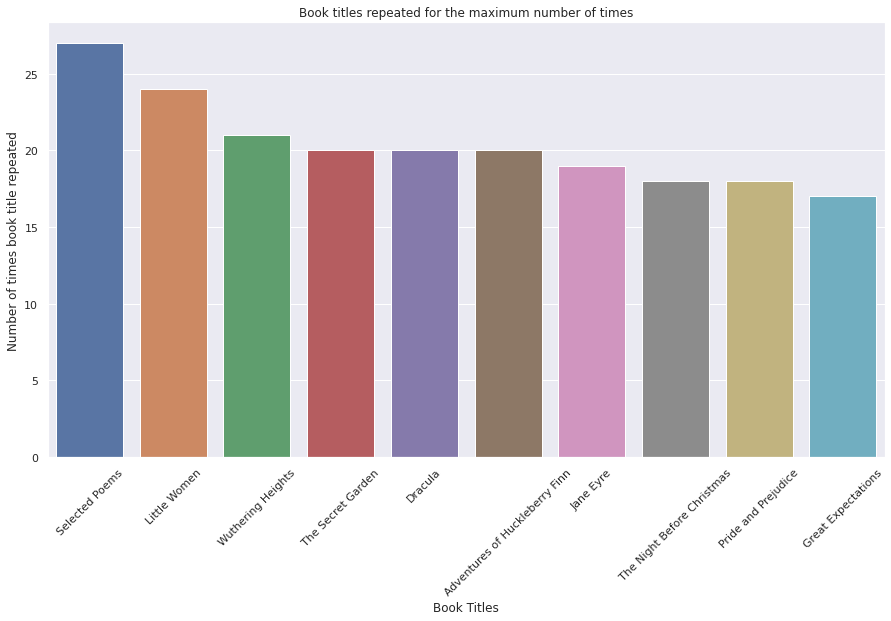

In [46]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x = 'Title', y = 'Count', data = max_titles)

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Book titles repeated for the maximum number of times')
figure.set(xlabel='Book Titles', ylabel='Number of times book title repeated')

# Displaying the graph
plt.show(figure)

## **Users Dataframe**

This dataframe contains the information related to the users who read the books.

### **Columns present in the dataset:**


*   **User-ID:** Unique ID of the user
*   **Location:** Location of the user

*   **Age:** Age of the user

In [26]:
# Importing the users dataframe

users_df = pd.read_csv('/content/drive/MyDrive/Users.csv')

In [27]:
# Printing the first 5 rows of the users dataframe

users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
# Printing the last 5 rows of the users dataframe

users_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [29]:
# Checking the number of rows and columns of the books dataframe

print(f'The users dataframe has {users_df.shape[0]} rows and {users_df.shape[1]} columns')

The users dataframe has 278858 rows and 3 columns


In [30]:
# Printing the columns present in the users dataframe

users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [33]:
# Checking the datatype of each column of the users dataframe

users_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [34]:
# Checking if any duplicate rows in the users dataframe

users_df.duplicated().sum()

0

In [35]:
# Renaming the columns for easiness

users_df.rename(columns = {'User-ID':'user_id'}, inplace = True)

In [36]:
# Checking the unique number of entries in each column

users_df.nunique()

user_id     278858
Location     57339
Age            165
dtype: int64

In [37]:
# Checking the basic information of the users dataframe

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
# Printing the statistical information of the users dataframe

users_df.describe(include = 'all')

,user_id,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [39]:
# Checking the number of null values in the users dataframe

users_df.isnull().sum()

user_id          0
Location         0
Age         110762
dtype: int64

In [ ]:
# users_df['Age'].fillna(users_df['Age'].mean(), inplace=True)

In [43]:
# Defining a function to get the country of the user from the location

def part_string(string):
  '''
  The function returns the country from the location of the user
  '''
  country = string.rpartition(' ')[-1]
  if country=='zealand':
    return 'new zealand'
  else:
    return country

In [44]:
# Creating a new column 'Country' to store country from the location

users_df['Country'] = users_df['Location'].apply(part_string)

### Top 10 countries where maximum number of the users are based from

In [45]:
# Creating a dataframe of the countries where maximum number of users are based
max_countries = pd.DataFrame(users_df['Country'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
max_countries.rename(columns = {'index':'Country', 'Country':'Count'}, inplace=True)

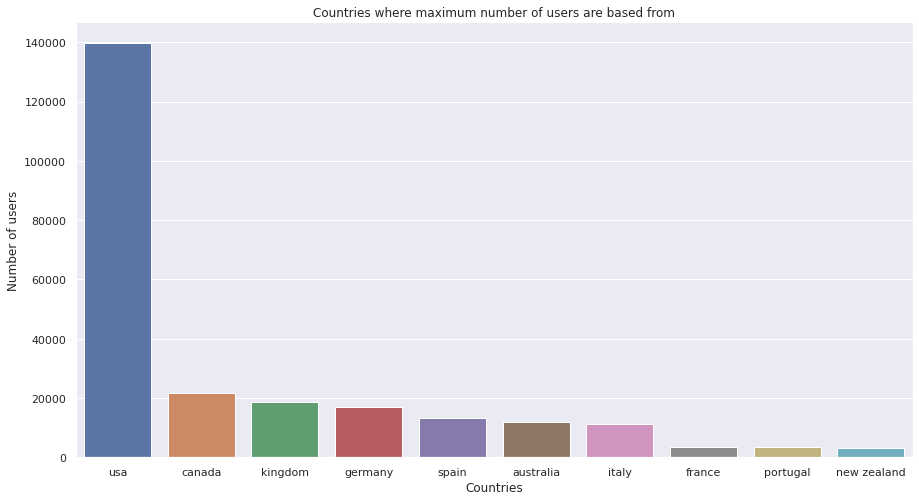

In [47]:
# Defining the plot size
plt.figure(figsize=(15,8))

# Plotting a bargraph
figure = sns.barplot(x='Country', y='Count', data=max_countries)

# Defining the title and x and y labels
figure.set(title='Countries where maximum number of users are based from')
figure.set(xlabel='Countries', ylabel='Number of users')

# Displaying the graph
plt.show(figure)

### Distribution of the user's age reading books

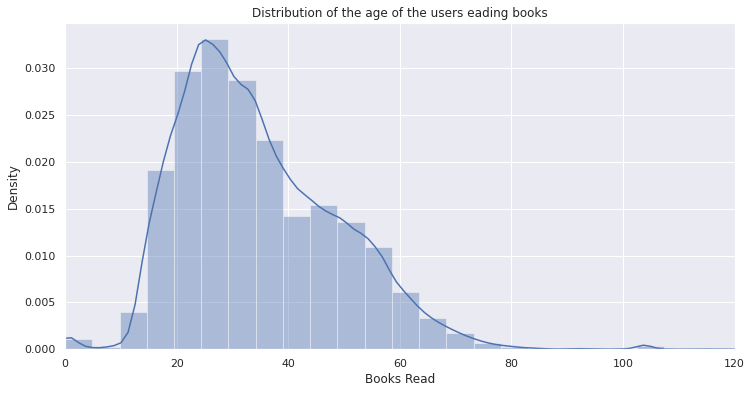

In [54]:
# Defining the plot size
plt.figure(figsize=(12,6))

# Plotting a distribution plot
figure = sns.distplot(users_df['Age'])

# Defining the title and x and y labels
figure.set(title='Distribution of the age of the users eading books')
figure.set(xlabel='Books Read')

# Defining the x-axis data range
plt.xlim(0, 120)

# Displaying the graph
plt.show(figure)

## **Rating Dataframe**

This dataframe contains the book rating information.

Book-Ratings are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### **Columns present in the dataset:**


*   **User-ID:** Unique ID of the user
*   **ISBN:** Unique ID to identify a book

*   **Book-Rating:** Ratings of the book (In the range of 0-10)

In [ ]:
ratings_df = pd.read_csv('/content/drive/MyDrive/Ratings.csv')

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [ ]:
ratings_df.shape

(1149780, 3)

In [ ]:
ratings_df.rename(columns = {'User-ID':'user_id', 'Book-Rating':'Rating'}, inplace = True)

In [ ]:
ratings_df.head()

,user_id,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df.isnull().sum()

user_id    0
ISBN       0
Rating     0
dtype: int64

In [ ]:
ratings_df.dtypes

user_id     int64
ISBN       object
Rating      int64
dtype: object

In [ ]:
ratings_df.duplicated().sum()

0

In [ ]:
ratings_df.nunique()

user_id    105283
ISBN       340556
Rating         11
dtype: int64

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_df.describe(include = 'all')

,user_id,ISBN,Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


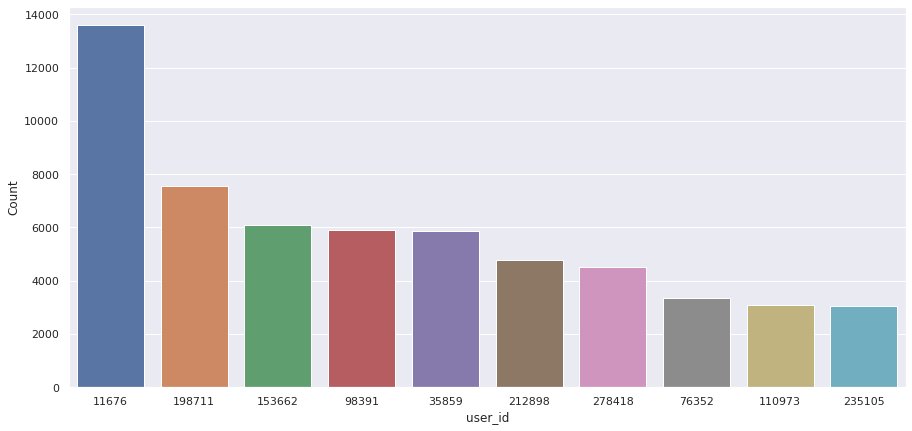

In [ ]:
top_users = pd.DataFrame(ratings_df['user_id'].value_counts()[:10]).reset_index()
top_users.rename(columns = {'index':'user_id', 'user_id':'Count'}, inplace=True)
plt.figure(figsize=(15,7))
sns.barplot(x='user_id', y='Count', data=top_users, order=top_users.sort_values('Count', ascending=False).user_id)

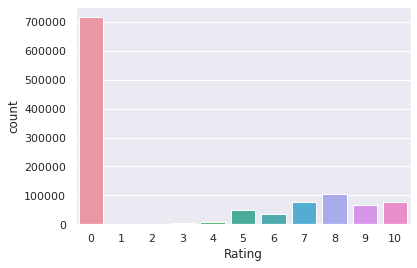

In [ ]:
sns.countplot(x=ratings_df['Rating'])

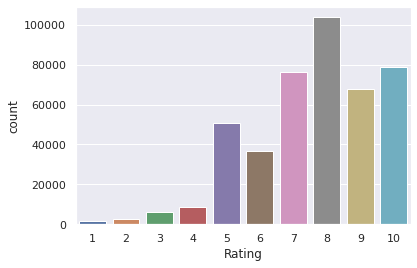

In [ ]:
rating = ratings_df[ratings_df['Rating']!=0]
sns.countplot(x = rating['Rating'], data=rating)